# Exam 3 JCDS Purwadhika BDG
by: Tito Tamaro <br>
Dataset : https://github.com/Lecturer-Jcds/Machine-Learning-Exam/blob/master/bank.csv

# Import Package

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Function

In [2]:
def dataframe_description(dataframe,samples=2): 
    bsDESC=[]
    for i in dataframe.columns:
        bsDESC.append([
            i, 
            dataframe[i].dtypes, 
            dataframe[i].isnull().sum(), 
            round((((dataframe[i].isnull().sum()) / (len(dataframe))) * 100),2),
            dataframe[i].nunique(), 
            dataframe[i].drop_duplicates().sample(samples).values,
        ])
    dfDesc = pd.DataFrame(bsDESC,columns=['dataFeatures','dataType','nullValues','nullPercentage','unique','sample'])
    return dfDesc 

# Data Attributes

| Variable Name | Description | Data Type |
|--|--|--|
RowNumber | Baris tempat data tersedia (dijadikan index ) | integer
CustomerId | Customer Id dari seluruh nasabah, semuanya unik tidak terdapat data yang sama | integer
Surname | Nama belakang / nama keluarga nasabah | string
CreditScore | Nilai kredit dari nasabah, semakin besar semakin baik bagi bank (mencakup sejarah peminjaman etc.) | integer
Geography | Lokasi dimana nasabah berasal | string
Gender | Jenis kelamin nasabah | string 
Age | Umur nasabah | string
Tenure | Merupakan jumlah kepemilikan tanah / property nasabah | integer
Balance | Jumlah uang nasabah dalam rekening bank | integer
NumOfProducts | Jumlah produk dari bank (seperti deposito, asuransi, dll.) | integer
HasCrCard | Kepemilikan kartu kredit oleh nasabah  | integer
IsActiveMember | Merupakan skor keaktifan nasabah yang diberikan bank (nilainya 0 atau 1), keaktifan disini merupakan aktivitas transaksi yang dilakukan | integer
EstimatedSalary | Perkiraan gaji nasabah | integer
Exited | Status nasabah, dimana 0 menandakan masih menjadi nasabah dan 1 sudah keluar atau tidak menjadi nasabah | integer

# Problems

Dari data terdapat 19.8% nasabah yang berpindah bank, apabila setiap nasabah memiliki jumlah uang dengan nilai rata-rata balance maka dapat dihitung jumlah kerugian yang diperoleh bank adalah: 
19.8% (jumlah churn) x rata-rata balance x 10000 (jumlah nasabah) = $ 19.8 milyar dollar

Oleh karena itu nilai churn ini harus ditekan serendah mungkin

# Goals

Data merupakan nasabah bank yang memutuskan untuk keluar dari bank, terdapat berbagai atribut yang dapat dipakai untuk memprediksi kelompok nasabah seperti apa yang dapat nantinya akan memutuskan keluar / berpindah bank. 

Goal :

1. Menemukan faktor yang paling mempengaruhi nasabah untuk berpindah bank
2. Analisa setiap feature dan hubungannya dengan nasabah yang berpindah bank
3. Pemodelan yang dapat memprediksi seorang nasabah akan keluar atau tidak dengan akurasi tinggi (>80%)

# Data Description 

In [3]:
df = pd.read_csv('bank.csv',index_col=0)

In [4]:
df.head() # terdapat 13 kolom / features dengan features 'Exited' sebagai TARGET

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataframe_description(df)

,dataFeatures,dataType,nullValues,nullPercentage,unique,sample
0,CustomerId,int64,0,0.0,10000,"[15621893, 15640106]"
1,Surname,object,0,0.0,2932,"[Teng, Vassiliev]"
2,CreditScore,int64,0,0.0,460,"[427, 740]"
3,Geography,object,0,0.0,3,"[Spain, France]"
4,Gender,object,0,0.0,2,"[Male, Female]"
5,Age,int64,0,0.0,70,"[66, 30]"
6,Tenure,int64,0,0.0,11,"[4, 10]"
7,Balance,float64,0,0.0,6382,"[99587.43, 130575.26]"
8,NumOfProducts,int64,0,0.0,4,"[3, 2]"
9,HasCrCard,int64,0,0.0,2,"[0, 1]"


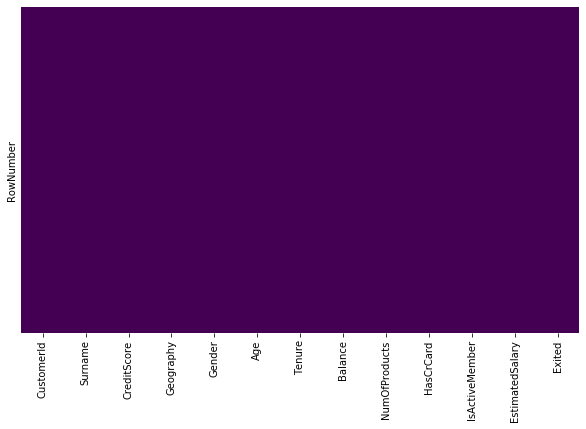

In [6]:
plt.figure(figsize=(10,6)) # NaN value visualization

sns.heatmap(df.isna(), yticklabels=False, cmap='viridis', cbar=False)
plt.show()

- Terdapat 13 features dengan kolom 'Exited' sebagai <b>target</b>
- Tidak terdapat NaN Values sehingga tidak diperlukan imputasi
- Terdapat 3 categorical features dan 10 numerical features dalam dataset
- CustomerID seluruhnya unique, tidak terdapat double data

# Exploratory Data Analysis

## Data Distribution - Numerical Features

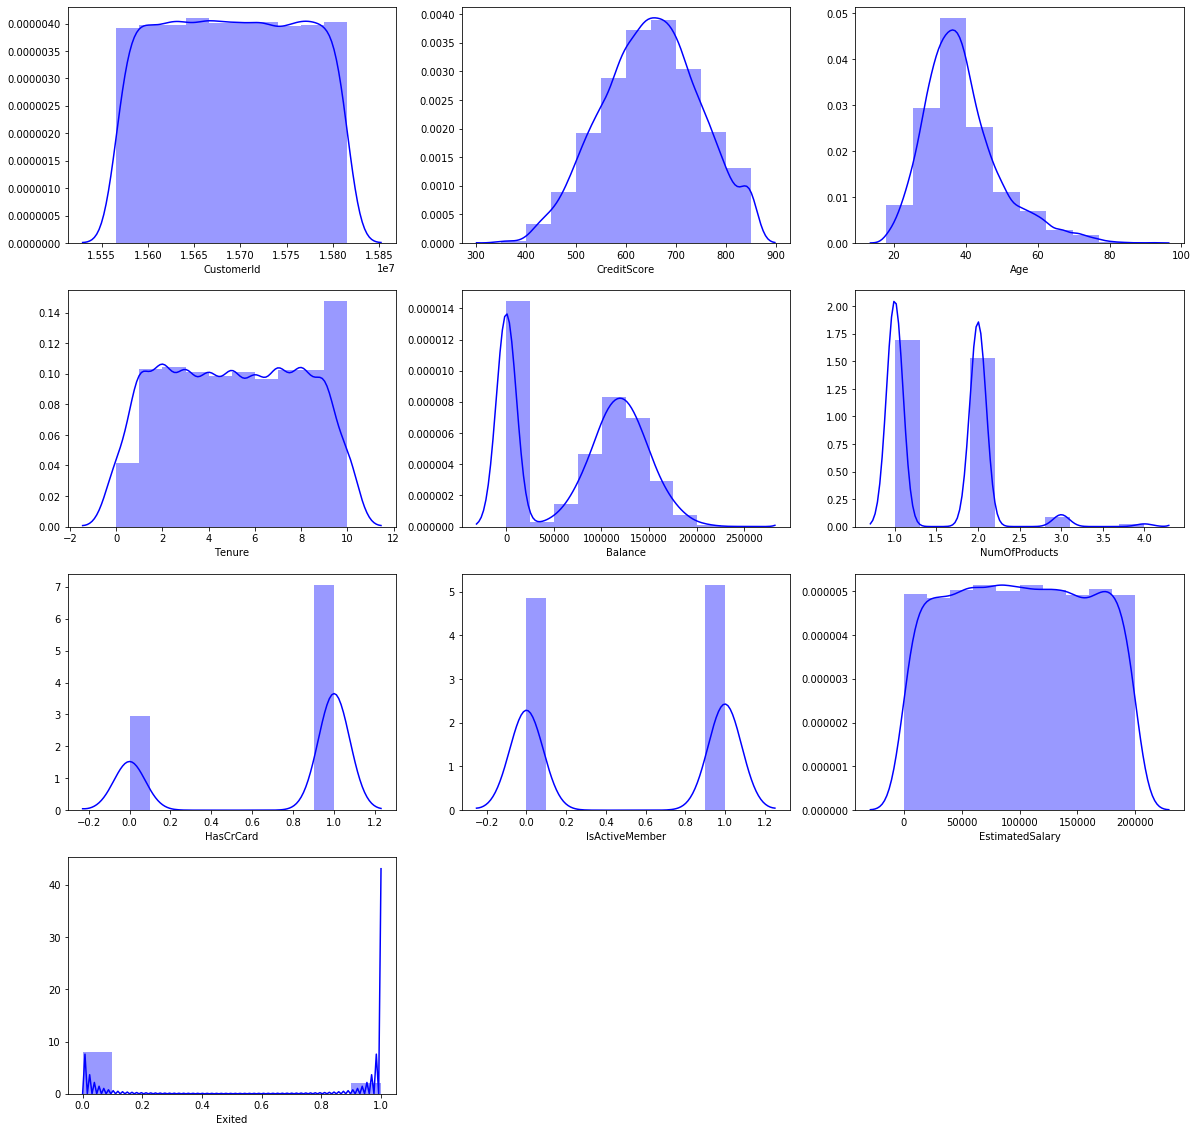

In [7]:
col = df.drop(['Surname','Geography','Gender'],axis=1)
columnList = list(col)
columnList

fig = plt.figure(figsize=[20,20])
for j,i in zip(columnList,range(1,11)):
    axes = fig.add_subplot(4,3,i)
    sns.distplot(df[j],bins=10,ax=axes, color='blue') # jumlah bins 1/10 jumlah data
plt.show()

## Boxplot - Numercial Features

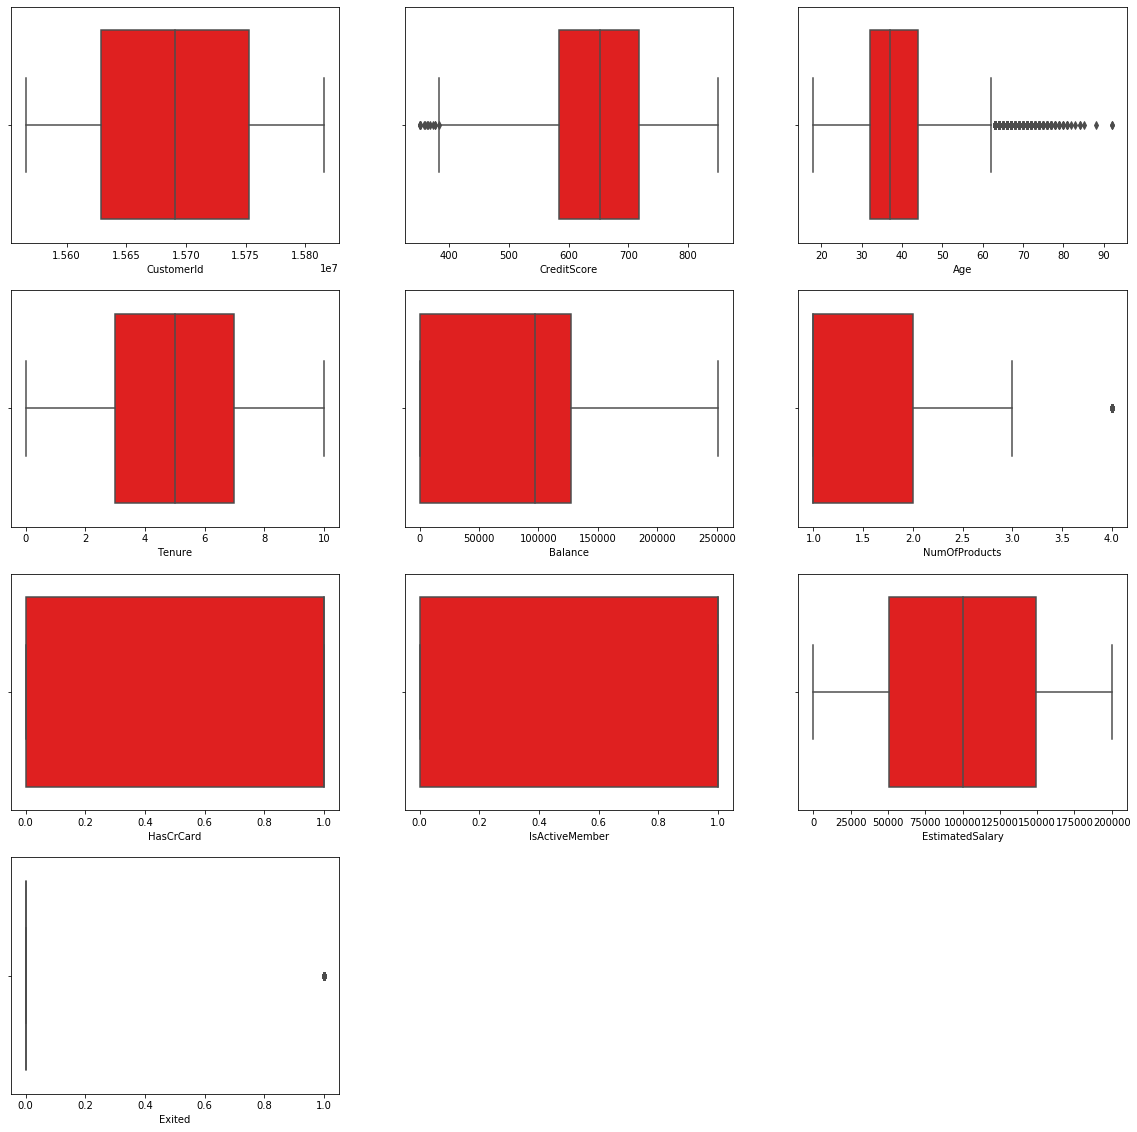

In [8]:
col = df.drop(['Surname','Geography','Gender'],axis=1)
columnList = list(col)
columnList

fig = plt.figure(figsize=[20,20])
for j,i in zip(columnList,range(1,11)):
    axes = fig.add_subplot(4,3,i)
    sns.boxplot(df[j],ax=axes, color='red') # jumlah bins 1/10 jumlah data
plt.show()

Berdasarkan distribusi dapat dilihat bahwa sebagian besar data sudah memiliki distribusi mendekati distribusi normal, namun untuk features CreditScore, Age,dan NumOfProducts terdapat outlier yang terdeteksi pada boxplot sehingga perlu dilakukan Outlier Handling untuk features ini

## Data Distribution - Categorical Features

In [9]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

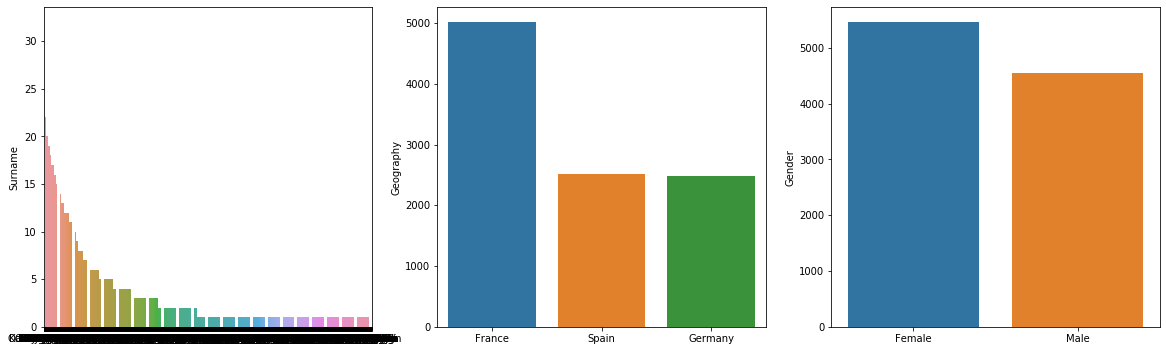

In [10]:
col2 = df.drop(['CustomerId', 'CreditScore',
        'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],axis=1)
columnList = list(col2)

fig = plt.figure(figsize=[20,20])
for j,i in zip(columnList,range(1,4)):
    axes = fig.add_subplot(3,3,i)
    z = df[j].value_counts()
    sns.barplot(df[j].unique(),z)
plt.show()

- Terdapat surname yang populer di bank ini
- Nasabah dengan asal negara terbanyak berturut-turut adalah France, Spain, Germany
- Nasabah perempuan lebih banyak dibandingkan nasabah laki-laki

# Outlier Handling

Outlier Handling yang akan dilakukan menggunakan upper fence dan lower fence sebagai batasannya dimana : 

<b>IQR = Q3 - Q1<br>
Upper Fence = Q3 + 1.5 X IQR<br>
Lower Fence = Q1 - 1.5 x IQR</b><br>

Dimana nilai dalam feature yang diatas Upper Fence dan dibawah Lower Fence akan dianggap sebagai <b>Outlier</b><br>

Jelas kondisinya akan disesuaikan dengan kondisi feature, dimana terdapat nilai outlier akan <b>dihapus / dibiarkan</b>.

Seperti yang tertulis pada bagian distribusi data, ditemukan outlier pada features CreditScore, Age,dan NumOfProducts

## CreditScore

In [11]:
IQR_CS = (df['CreditScore'].quantile(0.75)) - (df['CreditScore'].quantile(0.25)) # IQR
lower_fence_CS = (df['CreditScore'].quantile(0.25)) - (1.5 * IQR_CS) # Q1 - 1.5 X IQR
upper_fence_CS = (df['CreditScore'].quantile(0.75)) + (1.5 * IQR_CS) # Q3 + 1.5 X IQR
print(f'Lower Fence CS : {lower_fence_CS}')
print(f'Upper Fence CS : {upper_fence_CS}')

Lower Fence CS : 383.0
Upper Fence CS : 919.0


In [12]:
jumlah_outlier_CS = len(df[df['CreditScore'] < lower_fence_CS]) 
persen_CS = (jumlah_outlier_CS / len(df)) * 100
print(f'Jumlah Outlier yang dihandle adalah : {jumlah_outlier_CS} data ({persen_CS})%')
df.drop(df[df['CreditScore']<lower_fence_CS].index,axis=0,inplace=True)

Jumlah Outlier yang dihandle adalah : 15 data (0.15)%


Sesuai dengan yang ada pada grafik distribusi, data yang di handle hanyalah data dibawah lower fence

## Age

In [13]:
IQR_age = (df['Age'].quantile(0.75)) - (df['Age'].quantile(0.25)) # IQR
lower_fence_age = (df['Age'].quantile(0.25)) - (1.5 * IQR_age) # Q1 - 1.5 X IQR
upper_fence_age = (df['Age'].quantile(0.75)) + (1.5 * IQR_age) # Q3 + 1.5 X IQR
print(f'Lower Fence age : {lower_fence_age}')
print(f'Upper Fence age : {upper_fence_age}')

Lower Fence age : 14.0
Upper Fence age : 62.0


In [14]:
jumlah_outlier_age = len(df[df['Age'] > upper_fence_age]) 
persen_age = (jumlah_outlier_age / len(df)) * 100
print(f'Jumlah Outlier yang dihandle adalah : {jumlah_outlier_age} data ({persen_age})%')
df.drop(df[df['Age']>upper_fence_age].index,axis=0,inplace=True)

Jumlah Outlier yang dihandle adalah : 359 data (3.5953930896344515)%


Sesuai dengan yang ada pada grafik distribusi, data yang di handle hanyalah data diatas upper fence

## NumOfProducts

In [15]:
IQR_NP = (df['NumOfProducts'].quantile(0.75)) - (df['NumOfProducts'].quantile(0.25)) # IQR
lower_fence_NP = (df['NumOfProducts'].quantile(0.25)) - (1.5 * IQR_NP) # Q1 - 1.5 X IQR
upper_fence_NP = (df['NumOfProducts'].quantile(0.75)) + (1.5 * IQR_NP) # Q3 + 1.5 X IQR
print(f'Lower Fence NP : {lower_fence_NP}')
print(f'Upper Fence NP : {upper_fence_NP}')

Lower Fence NP : -0.5
Upper Fence NP : 3.5


In [16]:
jumlah_outlier_NP = len(df[df['NumOfProducts'] > upper_fence_NP]) 
persen_NP = (jumlah_outlier_NP / len(df)) * 100
print(f'Jumlah Outlier yang dihandle adalah : {jumlah_outlier_NP} data ({persen_NP})%')
df.drop(df[df['NumOfProducts']>upper_fence_NP].index,axis=0,inplace=True)

Jumlah Outlier yang dihandle adalah : 58 data (0.6025348015790567)%


Sesuai dengan yang ada pada grafik distribusi, data yang di handle hanyalah data diatas upper fence

In [17]:
data = [{
    'Upper Fence':f'{lower_fence_CS}',
    'Lower Fence':f'{upper_fence_CS}',
    'Jumlah Outlier yang di Handle':f'{jumlah_outlier_CS}'
},
    
{
    'Upper Fence':f'{lower_fence_age}',
    'Lower Fence':f'{upper_fence_age}',
    'Jumlah Outlier yang di Handle':f'{jumlah_outlier_age}'  
},
{
    'Upper Fence':f'{lower_fence_NP}',
    'Lower Fence':f'{upper_fence_NP}',
    'Jumlah Outlier yang di Handle':f'{jumlah_outlier_NP}'
    
    }]

In [18]:
pd.DataFrame(data,index=['Credit Score','Age','NumOfProducts']) # Outlier Handling Summary

,Upper Fence,Lower Fence,Jumlah Outlier yang di Handle
Credit Score,383.0,919.0,15
Age,14.0,62.0,359
NumOfProducts,-0.5,3.5,58


# Data Analysis

## - Univariate Analysis

## Features Target - 'Exited'

In [19]:
df.Exited.value_counts()

0    7677
1    1891
Name: Exited, dtype: int64

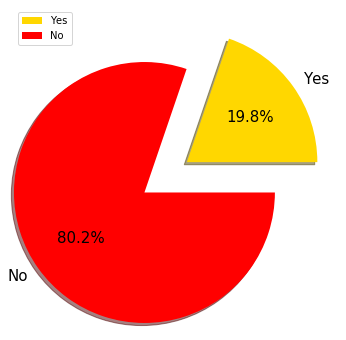

In [20]:
y = (len(df[df['Exited']==1])/len(df))*100
n = (len(df[df['Exited']!=1])/len(df))*100
persentase = [y,n]
nama = ['Yes','No']

plt.figure(figsize=(7,6))
plt.pie(
    persentase, 
    labels=nama,
    colors=['gold','red'],
    startangle= 0,
    shadow=True,
    textprops={
        'size':15 ,
        'color':'k'
    },
    autopct='%1.1f%%', # float format
    explode=(.1,0.3)
)
plt.legend()
plt.show()

Terdapat 7963 (79.6%) nasabah yang memutuskan untuk tetap menjadi nasabah dan 2037 (20.4%) nasabah yang memutuskan untuk keluar dari bank ini. Terdapat <b>imbalance data</b> pada target walaupun tidak terlalu parah. Dalam pemodelan akan digunakan metode SMOTE untuk menyelesaikan permasalahan imbalanced data ini.

## Surname

In [21]:
x = pd.crosstab(index=df.Surname, columns=df.Exited, values=df.Surname,aggfunc='count')
x.sort_values(by=1,ascending=False).head(10)

Exited,0,1
Surname,,
McGregor,12.0,9.0
Martin,19.0,9.0
Smith,20.0,8.0
Manna,10.0,7.0
Cocci,10.0,7.0
Lin,9.0,7.0
Wang,15.0,7.0
Shih,18.0,7.0
Lo,12.0,7.0


Nasabah dengan Surname McGregor dan Martin memiliki jumlah pindah bank yang paling banyak yaitu 9 orang. <br>
Walaupun demikian, surname bukanlah tolak ukur yang <b>objektif</b> dalam menentukan berpindah atau tidaknya nasabah. <br>
Oleh karena itu fitur ini akan <b>didrop</b> dalam pemodelan

## Credit Score

In [22]:
#binning agar dapat terlihat lebih mudah
bins = [380,481,581,681,781,850] # binning dengan interval 100 dari skor kredit terendah hingga terbesar
label = ['(380-480)','(481-580)','(581-680)','(681-780)','(781-850)'] 
df['CS_binned']=pd.cut(df['CreditScore'],bins=bins,labels=label)
df[['CreditScore','CS_binned','Exited']].head()

,CreditScore,CS_binned,Exited
RowNumber,,,
1,619,(581-680),1
2,608,(581-680),0
3,502,(481-580),1
4,699,(681-780),0
5,850,(781-850),0


In [23]:
print(df.CreditScore.min())
print(df.CreditScore.max())

383
850


In [24]:
pd.crosstab(index=df.CS_binned, columns=df.Exited, values=df.CreditScore,aggfunc='mean',normalize='all')

Exited,0,1
CS_binned,,
(380-480),0.071467,0.070989
(481-580),0.085094,0.085278
(581-680),0.099941,0.099826
(681-780),0.114339,0.114574
(781-850),0.129283,0.129210


Dapat dilihat bahwa kredit skor tidak mempengaruhi target, karena baik lebih besar atau tidak kredit skornya tetap terdapat nasabah yang memilih untuk keluar dari bank

## Geography

In [25]:
pd.crosstab(index=df.Geography, columns=df.Exited, values=df.Geography,aggfunc='count',normalize='all')

Exited,0,1
Geography,,
France,0.423181,0.078282
Germany,0.171405,0.079222
Spain,0.207776,0.040134


Negara France merupakan negara dengan tingkat nasabah yang paling setia (0.4% dari keseluruhan data), sementara Negara German memiliki tingkat pindah nasabah yang paling tinggi (0.07% dari keseluruahan data)

## Gender

In [26]:
pd.crosstab(df['Gender'],df['Exited'],normalize='all')

Exited,0,1
Gender,,
Female,0.342600,0.110159
Male,0.459762,0.087479


Dari data terdapat kecenderungan wanita lebih banyak memilih untuk berpindah bank daripada pria

## Age

In [27]:
#binning agar dapat terlihat lebih mudah
bins = [18,28,38,48,58,68] # binning dengan interval 10 dari umur terendah hingga terbesar
label = ['(18-27)','(28-37)','(38-47)','(48-57)','(58-68)'] 
df['age_binned']=pd.cut(df['Age'],bins=bins,labels=label)
df[['Age','age_binned','Exited']].head()

,Age,age_binned,Exited
RowNumber,,,
1,42,(38-47),1
2,41,(38-47),0
3,42,(38-47),1
4,39,(38-47),0
5,43,(38-47),0


In [28]:
print(df.Age.min())
print(df.Age.max())

18
62


In [29]:
pd.crosstab(df['age_binned'],df['Exited'],values=df['age_binned'],aggfunc='count',normalize='all')

Exited,0,1
age_binned,,
(18-27),0.123298,0.009742
(28-37),0.402472,0.043474
(38-47),0.219045,0.080976
(48-57),0.044207,0.053216
(58-68),0.013094,0.010476


In [30]:
df[df.age_binned=='(38-47)'].Exited.value_counts()

0    2091
1     773
Name: Exited, dtype: int64

Kelompok umur yang paling sering berpindah bank adalah kelompok umur 38-47 sebanyak 0.8% (773 nasabah)

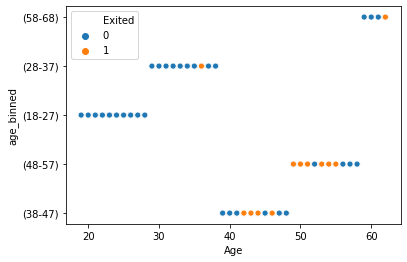

In [31]:
sns.scatterplot(x=df.Age,y=df.age_binned,hue=df.Exited,data=df)
plt.show()

Dapat dilihat terdapat kecenderungan semakin tinggi usia maka semakin banyak jumlah nasabah yang berpindah bank, hal ini akan dikonfirmasi kembali pada Corellation Matrix

## Tenure

In [32]:
pd.crosstab(df['Tenure'],df['Exited'],values=df['Tenure'],aggfunc='count',normalize='all')

Exited,0,1
Tenure,,
0,0.031668,0.009406
1,0.080686,0.022471
2,0.085284,0.019231
3,0.080372,0.020276
4,0.079536,0.020171
5,0.080686,0.020171
6,0.077446,0.019022
7,0.086538,0.017349
8,0.084344,0.019440


- Diperoleh hubungan dimana semakin banyak tenure (kepemilikan tanah / property) maka akan semakin kecil jumlah nasabah yang berpindah bank
- Tenure dengan jumlah 1 merupakan kelompok nasabah yang paling banyak berpindah bank

## Balance

In [33]:
#binning agar dapat terlihat lebih mudah
bins = [-1,50000,100000,260000] # binning menjadi 3 kelompok dari kelompok kurang mampu, menengah, dan kaya
label = ['(0-49999)','(50000-100000)','(100001-260000)'] 
df['balance_binned']=pd.cut(df['Balance'],bins=bins,labels=label)
df[['Balance','balance_binned','Exited']].head()

,Balance,balance_binned,Exited
RowNumber,,,
1,0.00,(0-49999),1
2,83807.86,(50000-100000),0
3,159660.80,(100001-260000),1
4,0.00,(0-49999),0
5,125510.82,(100001-260000),0


In [34]:
print(df.Balance.min())
print(df.Balance.max())

0.0
250898.09


In [35]:
pd.crosstab(df['balance_binned'],df['Exited'],values=df['Balance'],aggfunc=['count'],normalize='all')

count          
Exited                  0         1
balance_binned                     
(0-49999)        0.318144  0.051212
(50000-100000)   0.121969  0.029473
(100001-260000)  0.362249  0.116952

Kelompok nasabah dengan jumlah balance < 50000 merupakan jenis nasabah yang paling banyak berpindah bank

## NumOfProducts

In [36]:
pd.crosstab(df['NumOfProducts'],df['Exited'],values=df['NumOfProducts'],aggfunc=['count'],normalize='all')

count          
Exited                0         1
NumOfProducts                    
1              0.368834  0.141409
2              0.429139  0.034385
3              0.004390  0.021844

Nasabah yang memiliki / memakai produk bank paling sedikit (1) merupakan kelompok nasabah yang paling banyak berpindah bank

## HasCrCard

In [37]:
pd.crosstab(df['HasCrCard'],df['Exited'],values=df['HasCrCard'],aggfunc=['count'],normalize='all')

count          
Exited            0         1
HasCrCard                    
0          0.235159  0.059678
1          0.567203  0.137960

Nasabah yang memiliki kredit card merupakan kelompok nasabah yang paling banyak berpindah bank

## IsActiveMember

In [38]:
pd.crosstab(df['IsActiveMember'],df['Exited'],values=df['IsActiveMember'],aggfunc=['count'],normalize='all')

count          
Exited                 0         1
IsActiveMember                    
0               0.369356  0.126986
1               0.433006  0.070652

Nasabah yang dinilai oleh bank tidak aktif melakukan transaksi etc. merupakan kelompok nasabah dengan jumlah paling banyak berpindah bank

## EstimatedSalary

In [39]:
#binning agar dapat terlihat lebih mudah
bins = [-1,50000,100000,200000] # binning menjadi 3 kelompok dari kelompok kurang mampu, menengah, dan kaya
label = ['(0-49999)','(50000-100000)','(100001-200000)'] 
df['ES_binned']=pd.cut(df['EstimatedSalary'],bins=bins,labels=label)
df[['EstimatedSalary','ES_binned','Exited']].head()

,EstimatedSalary,ES_binned,Exited
RowNumber,,,
1,101348.88,(100001-200000),1
2,112542.58,(100001-200000),0
3,113931.57,(100001-200000),1
4,93826.63,(50000-100000),0
5,79084.10,(50000-100000),0


In [40]:
print(df.EstimatedSalary.min())
print(df.EstimatedSalary.max())

11.58
199992.48


In [41]:
pd.crosstab(df['ES_binned'],df['Exited'],values=df['ES_binned'],aggfunc=['count'],normalize='all')

count          
Exited                  0         1
ES_binned                          
(0-49999)        0.197533  0.047659
(50000-100000)   0.204431  0.049854
(100001-200000)  0.400397  0.100125

Nasabah dengan kelompok perkiraan pendapatan 100001-200000 merupakan kelompok nasabah yang paling banyak berpindah bank (~10%)

## - Bivariate Analysis

(9, 0)

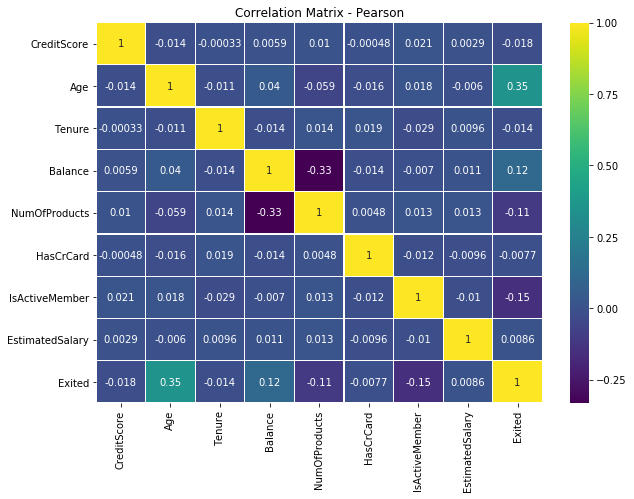

In [42]:
bi = df.drop(['CustomerId','Surname','Geography','Gender'],axis=1)

plt.figure(figsize=(10,7))
plt.title('Correlation Matrix - Pearson')
x = sns.heatmap(bi.corr(),annot=True,linewidths=0.2,cmap='viridis')
x.set_ylim(9,0)

- Korelasi positif terkuat dengan target adalah Age dengan nilai 0.35 --> Menunjukkan semakin tinggi age, semakin besar jumlah nasabah yang berpindah bank
- Korelasi negatif terkuat dengan target adalah IsActiveMember dengan nilai -0.15 --> Menunjukkan semakin aktif member maka akan semakin kecil jumlahnya yang berpindah bank 

# Data Preprocessing

- Terdapat features yang harus didrop untuk memastikan model memiliki output yang baik
- Scaling, karena data memiliki skala yang berbeda-beda
- One Hot Encoding untuk categorical features
- Class Weight untuk handling Imbalance Data

## Feature Selection

In [43]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'CS_binned', 'age_binned',
       'balance_binned', 'ES_binned'],
      dtype='object')

In [44]:
df = df.drop(['CustomerId','Surname','CS_binned','age_binned','balance_binned','ES_binned'],axis=1)

## Feature Engineering

In [45]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [46]:
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})

<b>Get Dummies</b>

In [47]:
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [48]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,1,0


In [49]:
# storage to csv after outlier handling and Feature Selection & Engineering for easier handling on Modelling, scaling etc. continued on Modelling

# df.to_csv('df_exam.csv')